### Задание 1.3
Представьте собственные данные и постройте экстраполяцию полиномами первой, второй и третьей степени.

[-5.15831563 -3.7719744  -3.18103092 -2.02940954 -0.86486799  0.32089554
  0.84951375  2.25260259  3.05401016  3.6732518   5.26174812]
[24.83576323 15.76150856  8.83057307  3.78162171  1.39189516 -0.24832469
  0.63297478  3.9252059   9.48622616 16.10617239 25.42177902]


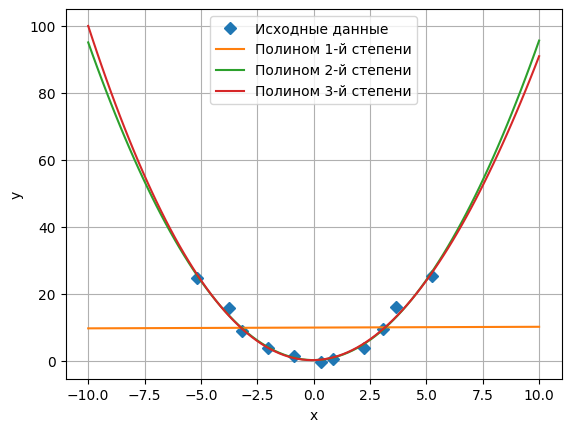

In [20]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from numpy.random import *

# Генерируем случайные х и у
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

#записываем данные в файл
x.tofile('src/practice_4/x_data.txt','\n')
y.tofile('src/practice_4/y_data.txt', '\n')

# читаем данные из файлов
x = fromfile('src/practice_4/x_data.txt', float, sep='\n')
y = fromfile('src/practice_4/y_data.txt', float, sep='\n')

print(x)
print(y)

# Чтение данных из файлов
x = np.fromfile('src/practice_4/x_data.txt', float, sep='\n')
y = np.fromfile('src/practice_4/y_data.txt', float, sep='\n')

# Экстраполяция полиномом первой степени
coefficients_1 = np.polyfit(x, y, 1)
poly_1 = np.poly1d(coefficients_1)

# Экстраполяция полиномом второй степени
coefficients_2 = np.polyfit(x, y, 2)
poly_2 = np.poly1d(coefficients_2)

# Экстраполяция полиномом третьей степени
coefficients_3 = np.polyfit(x, y, 3)
poly_3 = np.poly1d(coefficients_3)

# Генерация данных для экстраполяции
x_extrapolate = np.linspace(-10, 10, 100)
y_extrapolate_1 = poly_1(x_extrapolate)
y_extrapolate_2 = poly_2(x_extrapolate)
y_extrapolate_3 = poly_3(x_extrapolate)

# Построение графиков
plt.plot(x, y, 'D', label='Исходные данные')
plt.plot(x_extrapolate, y_extrapolate_1, label='Полином 1-й степени')
plt.plot(x_extrapolate, y_extrapolate_2, label='Полином 2-й степени')
plt.plot(x_extrapolate, y_extrapolate_3, label='Полином 3-й степени')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.savefig('src/practice_4/Экстраполяция.png')
plt.show()

### Задание 2.3
Подставьте собственные данные и поэкспериментируйте с представленными функциями.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

##### 1) f(x,b) = b0 + b1 * x

Оптимальные значения коэффициентов (b0, b1) для графика 1: [0.24655904 0.74947865]
Линейное отклонение для графика 1: 0.0003412493841481999
Квадратичное отклонение для графика 1: 0.03873641749225586


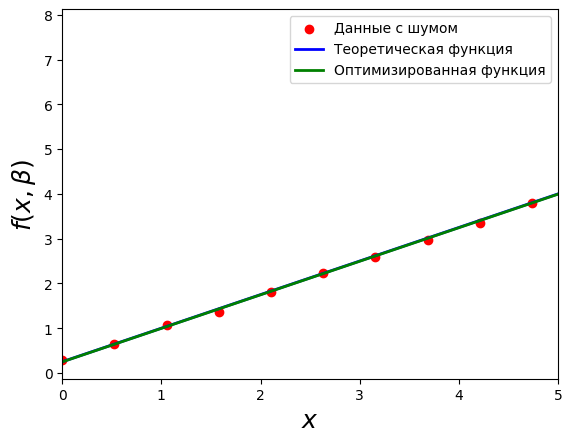

In [11]:
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x

# Зададим массив точек x
xdata = np.linspace(0, 10, 20)

# Создаем теоретически правильные значения точек y (без шума)
y = f(xdata, *beta)

# Добавляем шум в эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

# Оптимизация и вывод результатов
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print("Оптимальные значения коэффициентов (b0, b1) для графика 1:", beta_opt)

lin_dev = sum(beta_cov[0]) # Вычисляем линейное отклонение
print("Линейное отклонение для графика 1:", lin_dev)

residuals = ydata - f(xdata, *beta_opt) # Вычисляем остатки
fres = sum(residuals**2) # Вычисляем квадратичное отклонение
print("Квадратичное отклонение для графика 1:", fres)

# Построение графика
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, color='red', label='Данные с шумом')
ax.plot(xdata, y, color='blue', lw=2, label='Теоретическая функция')
ax.plot(xdata, f(xdata, *beta_opt), color='green', lw=2, label='Оптимизированная функция')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()
plt.show()

##### 2) f(x,b) = b0 + b1 * x + b2 * x * x

Оптимальные значения коэффициентов (b0, b1, b2) для графика 2: [0.22578982 0.76932355 0.49797341]
Линейное отклонение для графика 2: 0.0003684519236602914
Квадратичное отклонение для графика 2: 0.02630148002253002


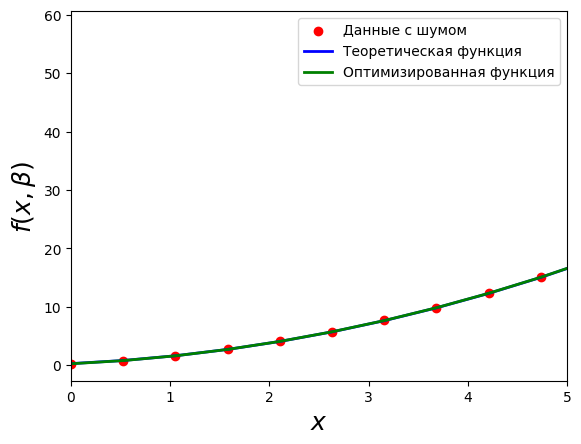

In [12]:
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x

# Зададим массив точек x
xdata = np.linspace(0, 10, 20)

# Создаем теоретически правильные значения точек y (без шума)
y = f(xdata, *beta)

# Добавляем шум в эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

# Оптимизация и вывод результатов
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print("Оптимальные значения коэффициентов (b0, b1, b2) для графика 2:", beta_opt)

lin_dev = sum(beta_cov[0]) # Вычисляем линейное отклонение
print("Линейное отклонение для графика 2:", lin_dev)

residuals = ydata - f(xdata, *beta_opt) # Вычисляем остатки
fres = sum(residuals**2) # Вычисляем квадратичное отклонение
print("Квадратичное отклонение для графика 2:", fres)

# Построение графика
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, color='red', label='Данные с шумом')
ax.plot(xdata, y, color='blue', lw=2, label='Теоретическая функция')
ax.plot(xdata, f(xdata, *beta_opt), color='green', lw=2, label='Оптимизированная функция')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()
plt.show()

##### 3) f(x,b) = b0 + b1 * ln(x)

Оптимальные значения коэффициентов (b0, b1) для графика 3: [1.05883865 1.9657374 ]
Линейное отклонение для графика 3: 0.0006623962843155668
Квадратичное отклонение для графика 3: 0.07905392750806621


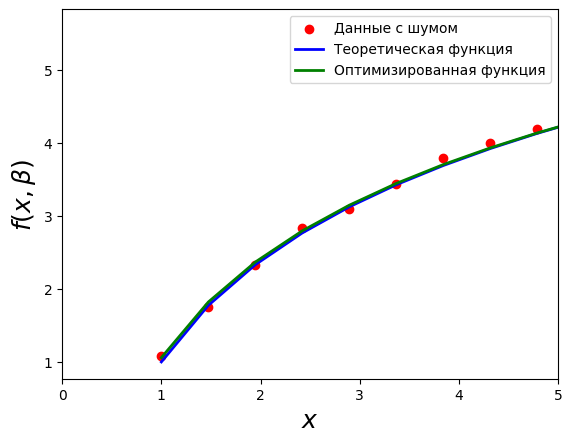

In [13]:
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)

# Зададим массив точек x
xdata = np.linspace(1, 10, 20)

# Создаем теоретически правильные значения точек y (без шума)
y = f(xdata, *beta)

# Добавляем шум в эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

# Оптимизация и вывод результатов
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print("Оптимальные значения коэффициентов (b0, b1) для графика 3:", beta_opt)

lin_dev = sum(beta_cov[0]) # Вычисляем линейное отклонение
print("Линейное отклонение для графика 3:", lin_dev)

residuals = ydata - f(xdata, *beta_opt) # Вычисляем остатки
fres = sum(residuals**2) # Вычисляем квадратичное отклонение
print("Квадратичное отклонение для графика 3:", fres)

# Построение графика
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, color='red', label='Данные с шумом')
ax.plot(xdata, y, color='blue', lw=2, label='Теоретическая функция')
ax.plot(xdata, f(xdata, *beta_opt), color='green', lw=2, label='Оптимизированная функция')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()
plt.show()

##### 4) f(x,b) = b0 * x ** b1

Оптимальные значения коэффициентов (b0, b1) для графика 4: [1.00006269 1.9997584 ]
Линейное отклонение для графика 4: 2.6607795481170976e-06
Квадратичное отклонение для графика 4: 0.037126728580201364


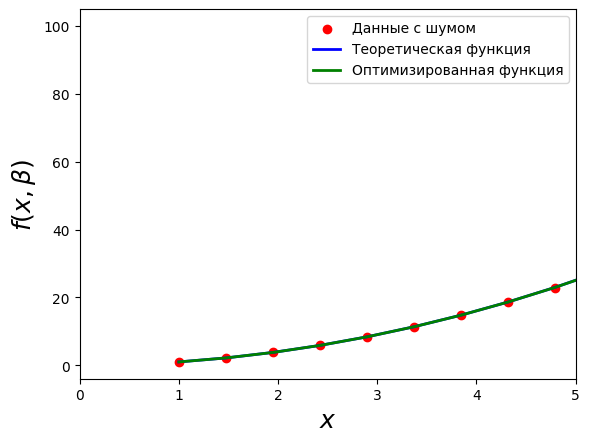

In [18]:
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1

# Зададим массив точек x
xdata = np.linspace(1, 10, 20)

# Создаем теоретически правильные значения точек y (без шума)
y = f(xdata, *beta)

# Добавляем шум в эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

# Оптимизация и вывод результатов
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print("Оптимальные значения коэффициентов (b0, b1) для графика 4:", beta_opt)

lin_dev = sum(beta_cov[0]) # Вычисляем линейное отклонение
print("Линейное отклонение для графика 4:", lin_dev)

residuals = ydata - f(xdata, *beta_opt) # Вычисляем остатки
fres = sum(residuals**2) # Вычисляем квадратичное отклонение
print("Квадратичное отклонение для графика 4:", fres)

# Построение графика
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, color='red', label='Данные с шумом')
ax.plot(xdata, y, color='blue', lw=2, label='Теоретическая функция')
ax.plot(xdata, f(xdata, *beta_opt), color='green', lw=2, label='Оптимизированная функция')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()
plt.show()

### Задание 2.3
Постройте модель линейной регрессии для произвольных данных из двух столбцов. 
Для примера можно взять точечную зависимость заработной платы от опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

In [ ]:
!pip install scikit-learn

Коэффициент пересечения (intercept): 25792.20019866871
Коэффициент наклона (slope): 9449.962321455074
Прогнозы заработной платы:
   YearsExperience  PredictedSalary
0               10        120291.82
1               15        167541.64
2               20        214791.45


D:\Dev\PycharmProjects\AI_practice\venv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


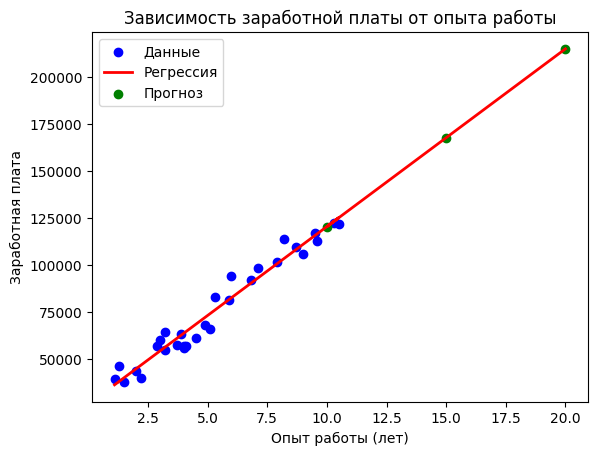

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Загрузка данных из CSV файла
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
data = pd.read_csv(url)

# Разделение данных на признаки (опыт работы) и целевую переменную (заработная плата)
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Получение коэффициентов линии регрессии
intercept = model.intercept_
slope = model.coef_[0]

# Вывод коэффициентов линии регрессии
print(f"Коэффициент пересечения (intercept): {intercept}")
print(f"Коэффициент наклона (slope): {slope}")

# Прогнозирование заработной платы для новых данных 
new_data = pd.DataFrame({'YearsExperience': [10, 15, 20]})
predicted_salary = model.predict(new_data)
print("Прогнозы заработной платы:")
predictions_df = pd.DataFrame({'YearsExperience': new_data['YearsExperience'], 'PredictedSalary': np.round(predicted_salary, 2)})
print(predictions_df)

# Построение графика
plt.scatter(X, y, color='blue', label='Данные')
#plt.plot(X, model.predict(X), color='red', linewidth=2, label='Регрессия')
plt.plot(np.append(X, new_data), model.predict(np.append(X, new_data).reshape(-1, 1)), color='red', linewidth=2, label='Регрессия')
plt.scatter(new_data, predicted_salary, color='green', label='Прогноз')
plt.xlabel('Опыт работы (лет)')
plt.ylabel('Заработная плата')
plt.title('Зависимость заработной платы от опыта работы')
plt.legend()
plt.show()

### Задание 3.3.1
Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. 
Постройте прогноз.
1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Загрузка данных из CSV файла
url = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
data = pd.read_csv(url)

X = data[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = data['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=313)

test_data = pd.DataFrame({'Petrol_tax': X_test['Petrol_tax'], 'Average_income': X_test['Average_income'], 'Paved_Highways': X_test['Paved_Highways'], 'Population_Driver_licence(%)': X_test['Population_Driver_licence(%)'], 'Petrol_Consumption': y_test})

print(test_data)

model = LinearRegression()
model.fit(X_train, y_train)

# Вывод коэффициентов множественной регрессии
coefficients = pd.DataFrame({'Параметр': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Прогнозирование на тестовых данных
predictions = model.predict(X_test)

# Вывод прогнозов
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(predictions_df)

#print(metrics.mean_squared_error(y_test, predictions))

    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
2          9.0            3865            1586                         0.580   
17         7.0            3718            4725                         0.540   
16         7.0            4206            8508                         0.572   
28         8.0            4188            5975                         0.563   
22         9.0            4897            2449                         0.511   
33         7.5            3357            4121                         0.547   
36         5.0            4045           17782                         0.566   
38         8.5            3635            3274                         0.663   
20         7.0            4593            7834                         0.663   
32         8.0            3063            6524                         0.578   

    Petrol_Consumption  
2                  561  
17                 714  
16                 603  
28                 

### Задание 3.3.2
Экспериментально получены N − значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов.

     x    y  poly1(x)  poly2(x)
0  0.0  6.0  4.285714  5.357143
1  0.2  3.0  4.171429  3.957143
2  0.4  2.0  4.057143  3.200000
3  0.6  6.0  3.942857  3.085714
4  0.8  2.0  3.828571  3.614286
5  1.0  5.0  3.714286  4.785714


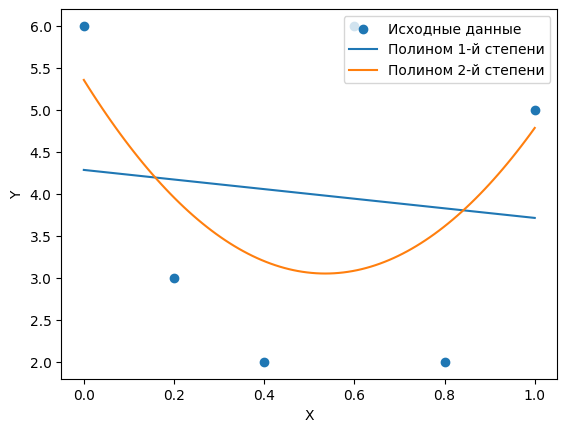

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([6.0, 3.0, 2.0, 6.0, 2.0, 5.0])

coefficients_1 = np.polyfit(x, y, 1)
poly_1 = np.poly1d(coefficients_1)

coefficients_2 = np.polyfit(x, y, 2)
poly_2 = np.poly1d(coefficients_2)

x_values = np.linspace(0, 1, 100)

y_values_1 = poly_1(x_values)
y_values_2 = poly_2(x_values)

df = pd.DataFrame({'x': x, 'y': y, 'poly1(x)': poly_1(x), 'poly2(x)': poly_2(x)})
print(df)

plt.scatter(x, y, label='Исходные данные')
plt.plot(x_values, y_values_1, label='Полином 1-й степени')
plt.plot(x_values, y_values_2, label='Полином 2-й степени')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()